In [3]:
import pandas as pd

annotations = pd.read_csv('annotations.csv')

display(annotations.head())

demographics =[
    "clinic_gender",
    "clinic_age",
    "clinic_ethnicity",
    "education",
    "current_smoking_status",
    "age_start_smoking_daily",
    "age_stopped_smoking",
    "years_smoked",
    "years_quit",
    "average_lifetime_cigarettesperda",
    "pack_years",
    "FEV1_abs",
    "FEV1_PP",
    "FVC_abs",
    "FVC_PP",
    "FEV1FVC",
    "Height",
    "Weight",
    "BMI",
    "GP_comment" 
]

scan_variables = [
    "Date_BaselineCT",
    "Date_BaselineReport",
    "time_to_report",
    "Reader_init",
    "Reader_init_other",
    "Prev_Scan",
    "Start_time_BaselineCT",
    "Stop_time_BaselineCT",
    "report_time",
    "CT_FU",
    "Imp1",
    "Imp2",
    "Tumour",
    "CT_T",
    "CT_N",
    "CT_M",
    "CT_stage",
    "Stage_reas",
    "Total_no_nods",
    "Brock_sc",
    "LungRADS_cat",
    "Recall_reason",
    "Emphysema",
    "Bronchiectasis",
    "Bronch_thick",
    "Muc_plug",
    "IPFlike_ILD",
    "nonIPFlike_ILD",
    "CAC",
    "Osteoporosis",
    "Cardiomegaly",
    "PE",
    "enlargedPA",
    "OA",
    "Aort_an",
    "Neck_mass",
    "Med_LN",
    "Hilar_LN",
    "Med_mass",
    "Liver_les",
    "Kid_les",
    "Adr_les",
    "Hiat_hern",
    "Pl_effusion",
    "Pericard_effusion",
    "Pl_thick_noncalc",
    "Pl_plaq_calc",
    "Bone_les",
    "Rib_frac",
    "Vert_frac",
    "Other_cardiac",
    "Other_incident" 
]

nodule_variables = [
    "_diam",
    "_vol",
    "_dens",
    "_type",
    "_type_other",
    "_lobe",
    "_loc",
    "_pos",
    "_pos_other",
    "_round",
    "_ovoid",
    "_amorph",
    "_tub",
    "_shape_other",
    "_irreg",
    "_spic",
    "_lobulated",
    "_smooth",
    "_margin_other",
    "_fat",
    "_calc",
    "_air_bronch",
    "_bubble",
    "_pl_teth",
    "_Pl_rxn",
]

nodule_all_variables = [
    "ScananonID",
    "Nod_comments"
]

,ScananonID,Date_study_entry,clinic_gender,clinic_age,clinic_ethnicity,education,current_smoking_status,age_start_smoking_daily,age_stopped_smoking,years_smoked,...,feb_Clin_T,feb_Clin_N,feb_Clin_M,feb_Clin_stage,feb_Path_T,feb_Path_N,feb_Path_M,feb_Path_PL,feb_Path_R,feb_Path_stage
0,UCLH_88113396,04apr2016,Male,67,White,1. Finished school at or before the age of fif...,Current smoker,20,NaN,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UCLH_50882667,05apr2016,Male,69,White,"2. Completed CSEs, O-levels or equivalent",Current smoker,17,NaN,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UCLH_20466996,06apr2016,Male,66,White,1. Finished school at or before the age of fif...,Former smoker,16,62.0,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UCLH_90062266,07apr2016,Male,65,White,1. Finished school at or before the age of fif...,Current smoker,14,NaN,51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UCLH_61426138,07apr2016,Male,70,White,6. Completed a further degree e.g. masters/PhD...,Former smoker,14,60.0,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Flag the cases that have successfully been converted to metaio, i.e., have a lung reconstruction and can be converted to metaio

In [21]:
lung_metadata = (
    pd.read_csv('lung_metadata.csv')
    .assign(ScananonID=lambda df: df.mhd_path.str.split('/').str[-1].str.replace('.mhd',''))
)
useable = lung_metadata.ScananonID.values
annotations['useable'] = annotations.ScananonID.isin(useable)

/var/folders/59/cd3dzx7560qgtrwc99hm0j2w0000gp/T/ipykernel_37234/2409594392.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  .assign(ScananonID=lambda df: df.mhd_path.str.split('/').str[-1].str.replace('.mhd',''))


True     731
False     31
Name: useable, dtype: int64

In [27]:
def cnt_and_pct(df, variable):

    cnts = df[variable].value_counts().rename('Counts')
    pct = df[variable].value_counts(normalize=True).apply(lambda x: round(x * 100,1)).rename('Percent')
    all = pd.merge(pd.DataFrame(cnts), pd.DataFrame(pct), left_index=True, right_index=True)

    df = df[df.useable]
    cnts = df[variable].value_counts().rename('Counts (Useable)')
    pct = df[variable].value_counts(normalize=True).apply(lambda x: round(x * 100,1)).rename('Percent (Useable)')
    useable = pd.merge(pd.DataFrame(cnts), pd.DataFrame(pct), left_index=True, right_index=True)
    return pd.merge(all, useable, how='left', left_index=True, right_index=True).fillna(0).sort_index()

print('Total number of subjects:', len(annotations.ScananonID.unique()))
print()
print('Ethnicity splits:')
display(cnt_and_pct(annotations, 'clinic_ethnicity'))
print()
print('Gender splits')
display(cnt_and_pct(annotations, 'clinic_gender'))
print()
print('# nodules')
display(cnt_and_pct(annotations, 'Total_no_nods'))

Total number of subjects: 762

Ethnicity splits:


,Counts,Percent,Counts (Useable),Percent (Useable)
Asian or Asian British,7,0.9,7,1.0
Black/ African/ Caribbean/ Black British,77,10.1,69,9.4
Mixed or multiple ethnic groups,8,1.0,8,1.1
Other ethnic group,31,4.1,30,4.1
Prefers not to say,3,0.4,2,0.3
White,636,83.5,615,84.1



Gender splits


,Counts,Percent,Counts (Useable),Percent (Useable)
Female,336,44.1,323,44.2
Male,426,55.9,408,55.8



# nodules


,Counts,Percent,Counts (Useable),Percent (Useable)
0.0,580,76.3,572,78.4
1.0,115,15.1,101,13.8
2.0,24,3.2,21,2.9
3.0,9,1.2,7,1.0
4.0,6,0.8,5,0.7
5.0,5,0.7,5,0.7
6.0,2,0.3,1,0.1
8.0,3,0.4,3,0.4
10.0,8,1.1,7,1.0
12.0,1,0.1,1,0.1


# Generate Dataset json for Detection
NOTE: This is just for inference so we only need a test ds. It is also only for pre-processing so the only structure that is needed is:

```
{
    "test" : [
        {
            "image" : "{ScananonID}/{ScananonID}.mhd"
        },
        ...
    ] 
}


In [37]:
import json

preprocessing_dataset_json = {"training" : [], "validation" : [], "test" : [] }
for scananonid in annotations[annotations.useable].ScananonID:

    preprocessing_dataset_json["test"].append({
        "image": f"{scananonid}/{scananonid}.mhd"
    })


json.dump(preprocessing_dataset_json, open("../../models/detection/datasplits/lsut/preprocessing/dataset.json", "w"), indent=4)

# replace mhd with nii.gz and save for inference dataset

dataset_json = json.dumps(preprocessing_dataset_json).replace(".mhd", ".nii.gz")

json.dump(json.loads(dataset_json), open("../../models/detection/datasplits/lsut/dataset.json", "w"), indent=4)

Read in results and convert labels to be 1, 2, 3 based on whether:

- threshold is > 0.125 -> red
- threshold is > 2 & < 0.125
- threshold is > 8 & < 2


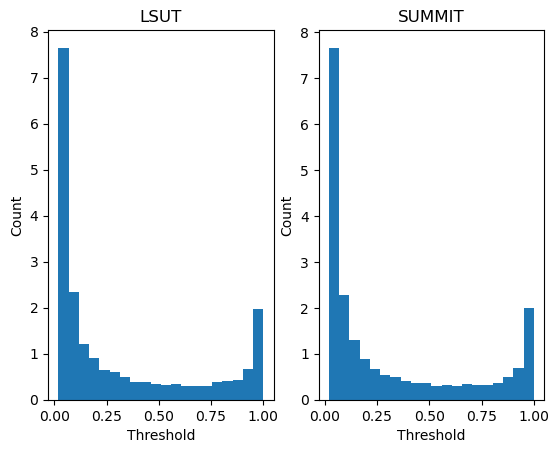

In [56]:

import matplotlib.pyplot as plt

result_lsut_opimisation = json.load(open("../..//models/detection/result/trained_summit/lsut/result_optimisation.json", 'r'))  
lsut_thresholds = pd.Series([thresh for itm in result_lsut_opimisation['test'] for thresh in itm['score']])

result_summit_opimisation = json.load(open("../..//models/detection/result/trained_summit/summit/optimisation/result_optimisation.json", 'r'))
summit_thresholds = pd.Series([thresh for itm in result_summit_opimisation['test'] for thresh in itm['score']])

fig, ax = plt.subplots(ncols=2, nrows=1)
ax[0].hist(lsut_thresholds, bins=20, density=True)
ax[0].set_title('LSUT')
ax[0].set_xlabel('Threshold')
ax[0].set_ylabel('Count')


ax[1].hist(summit_thresholds, bins=20, density=True)
ax[1].set_title('SUMMIT')
ax[1].set_xlabel('Threshold')
ax[1].set_ylabel('Count')

plt.show()

In [62]:
thresholds = {0.125: 0.99755859375, 2: 0.9365234375, 8: 0.3017578125}

box_mask_dataset_json = {"training" : [], "validation" : [], "test" : [] }
for itm in result_lsut_opimisation['test']:

    scores = []
    boxes = []
    labels = []
    for idx, (score, box) in enumerate(zip(itm['score'], itm['box'])):

        if score > thresholds[0.125]:
            labels.append(3)
            boxes.append(box)
            scores.append(score)

        elif score > thresholds[2]:
            labels.append(2)
            boxes.append(box)
            scores.append(score)

        elif score > thresholds[8]:
            labels.append(1)
            boxes.append(box)
            scores.append(score)

        else:
            pass

    box_mask_dataset_json["test"].append({
        "image": "/".join(itm['image'].split('/')[-2:]),
        "label": labels,
        "box": boxes,
        "score": scores
    })
    
json.dump(box_mask_dataset_json, open("../../models/detection/datasplits/lsut/box_mask_dataset.json", "w"), indent=4)